In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from deep_rl.cartpole.q_learning import FeatureTransformer, Model, play_one, plot_running_avg

In [0]:
env = gym.make('CartPole-v0')
ft = FeatureTransformer(env)


In [14]:
obs, _ = env.reset()
obs

array([ 0.02464296, -0.01830732, -0.03268201,  0.02524841], dtype=float32)

In [17]:
ft.transform(np.atleast_2d(obs)).shape

(1, 4000)

episode: 0 total reward: 13.0 eps: 1.0 avg reward (last 100): 13.0
episode: 100 total reward: 562.0 eps: 0.09950371902099892 avg reward (last 100): 150.79207920792078
episode: 200 total reward: 2000.0 eps: 0.07053456158585983 avg reward (last 100): 853.4851485148515
episode: 300 total reward: 2000.0 eps: 0.0576390417704235 avg reward (last 100): 2000.0
episode: 400 total reward: 2000.0 eps: 0.04993761694389223 avg reward (last 100): 1544.079207920792
avg reward for last 100 episodes: 2000.0
total steps: 652822.0


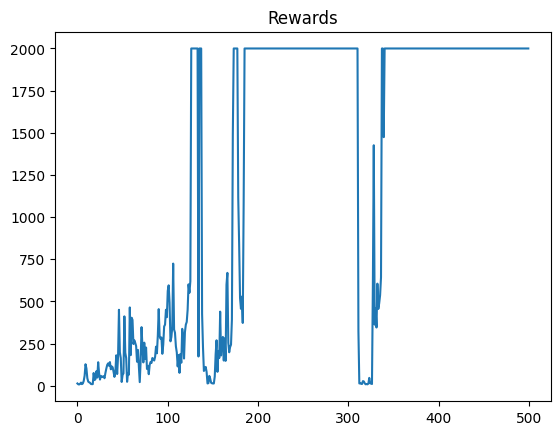

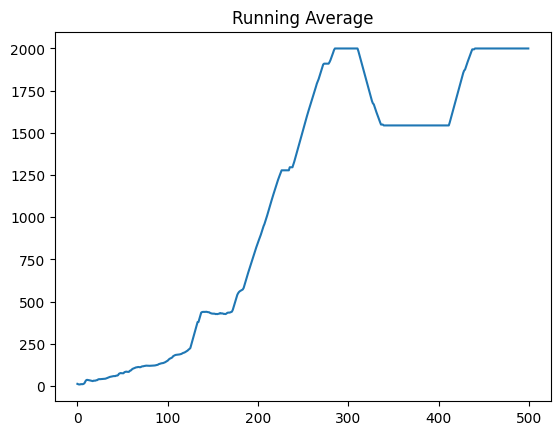

In [18]:
model = Model(env, ft)
gamma = 0.99

N = 500
totalrewards = np.empty(N)
costs = np.empty(N)
for n in range(N):
  eps = 1.0 / np.sqrt(n+1)
  totalreward = play_one(env, model, eps, gamma)
  totalrewards[n] = totalreward
  if n % 100 == 0:
    print("episode:", n, "total reward:", totalreward, "eps:", eps, "avg reward (last 100):", totalrewards[max(0, n-100):(n+1)].mean())

print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

plot_running_avg(totalrewards)

C:\Users\sam24\.conda\envs\rl\lib\site-packages\gymnasium\envs\registration.py:523: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
MovieWriter imagemagick unavailable; using Pillow instead.


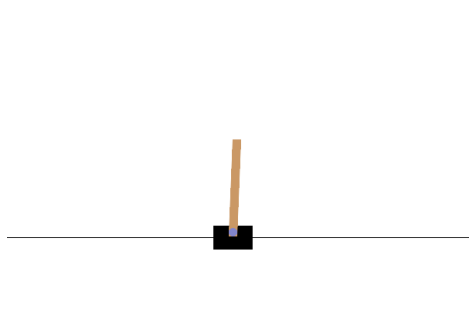

In [24]:
from utils.plot import play_episode_and_save_gif

env = gym.make('CartPole-v0', render_mode='rgb_array')
policy = lambda obs: model.sample_action(obs, eps=0)
play_episode_and_save_gif(env, policy, max_iter=500)